In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt


In [2]:
data_dir = 'data'

In [3]:
batch_size = 32
epochs = 10
image_size = (224, 224)

In [4]:
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data will be used for validation
)

data_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use training subset for training
)

validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use validation subset for validation
)

Found 734 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
hist=model.fit(
    data_generator,
    steps_per_epoch=len(data_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
23/23 [==============================] - 97s 4s/step - loss: 0.1326 - accuracy: 0.9523 - val_loss: 0.1830 - val_accuracy: 0.9180
Epoch 2/10
23/23 [==============================] - 93s 4s/step - loss: 0.1272 - accuracy: 0.9469 - val_loss: 0.7427 - val_accuracy: 0.7596
Epoch 3/10
23/23 [==============================] - 91s 4s/step - loss: 0.0822 - accuracy: 0.9659 - val_loss: 0.9274 - val_accuracy: 0.7650
Epoch 4/10
23/23 [==============================] - 92s 4s/step - loss: 0.1014 - accuracy: 0.9659 - val_loss: 0.1424 - val_accuracy: 0.9344
Epoch 5/10
23/23 [==============================] - 95s 4s/step - loss: 0.1045 - accuracy: 0.9646 - val_loss: 0.3534 - val_accuracy: 0.8689
Epoch 6/10
23/23 [==============================] - 95s 4s/step - loss: 0.1875 - accuracy: 0.9264 - val_loss: 0.7260 - val_accuracy: 0.6995
Epoch 7/10
23/23 [==============================] - 94s 4s/step - loss: 0.1111 - accuracy: 0.9659 - val_loss: 0.3618 - val_accuracy: 0.8743
Epoch 8/10
23/23 [==

In [9]:
hist.history

{'loss': [0.13255329430103302,
  0.12722410261631012,
  0.08220367133617401,
  0.10136986523866653,
  0.10453791916370392,
  0.1874808520078659,
  0.11111494898796082,
  0.15017284452915192,
  0.12919417023658752,
  0.09570971131324768],
 'accuracy': [0.9523161053657532,
  0.946866512298584,
  0.9659400582313538,
  0.9659400582313538,
  0.9645776748657227,
  0.9264305233955383,
  0.9659400582313538,
  0.9495912790298462,
  0.9523161053657532,
  0.9604904651641846],
 'val_loss': [0.1829516887664795,
  0.7427197098731995,
  0.9274494051933289,
  0.14240051805973053,
  0.3534378707408905,
  0.7260278463363647,
  0.36182349920272827,
  0.4844113886356354,
  0.7152908444404602,
  0.2502944767475128],
 'val_accuracy': [0.9180327653884888,
  0.7595628499984741,
  0.7650273442268372,
  0.9344262480735779,
  0.868852436542511,
  0.6994535326957703,
  0.874316930770874,
  0.7868852615356445,
  0.8087431788444519,
  0.9016393423080444]}

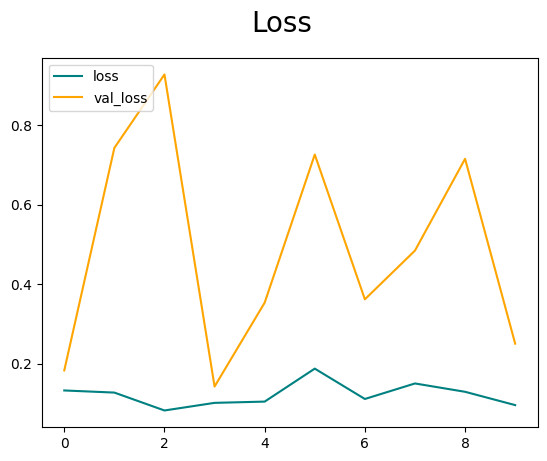

In [12]:
fig=plt.figure()
plt.plot (hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend (loc="upper left")
plt.show()

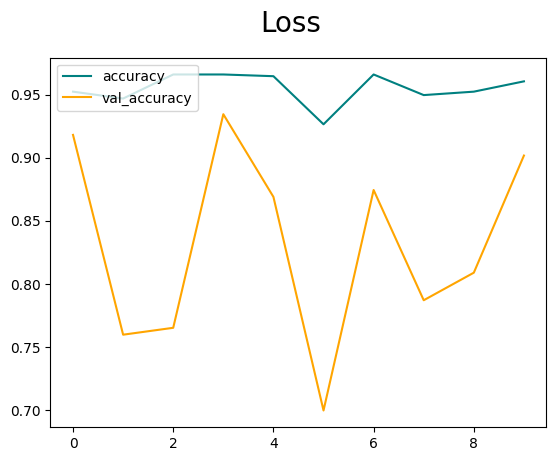

In [14]:
fig=plt.figure()
plt.plot (hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss',fontsize=20)
plt.legend (loc="upper left")
plt.show()

In [22]:
import numpy as np

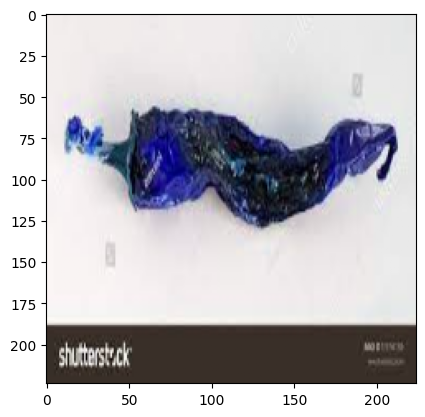

1/1 [==============================] - 0s 30ms/step


array([[0.99779314]], dtype=float32)

In [30]:
test_img = cv2.imread('data/test/bad.jpeg')
test_img = tf.image.resize(test_img, (224, 224))  # Resize to match the model's input size
test_img = test_img / 255.0  # Normalize pixel values

# Display the resized test image
plt.imshow(test_img)
plt.show()

# Predict using the model
yhat = model.predict(np.expand_dims(test_img, 0))
yhat

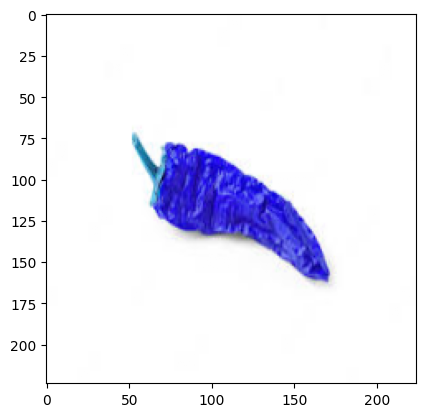

1/1 [==============================] - 0s 30ms/step


array([[0.9710804]], dtype=float32)

In [29]:
test_img = cv2.imread('data/test/good.jpeg')
test_img = tf.image.resize(test_img, (224, 224))  # Resize to match the model's input size
test_img = test_img / 255.0  # Normalize pixel values

# Display the resized test image
plt.imshow(test_img)
plt.show()

# Predict using the model
yhat = model.predict(np.expand_dims(test_img, 0))
yhat

In [28]:
yhat

array([[0.9710804]], dtype=float32)

In [ ]:
model.save('chilli_classifier_model.h5')

Found 734 images belonging to 2 classes.
Class Indices: {'BAD': 0, 'GOOD': 1}


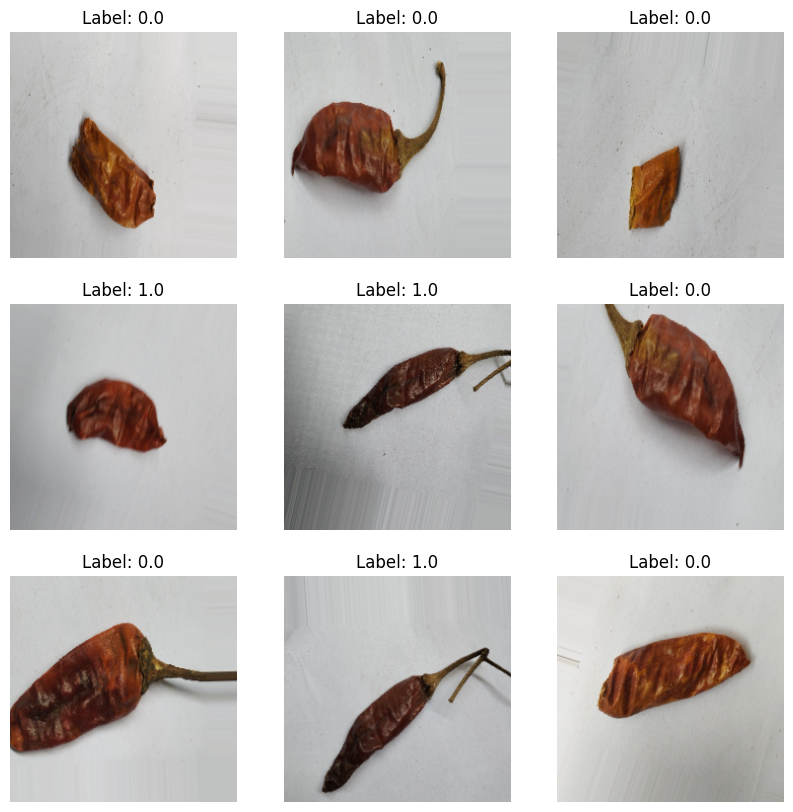

Found 183 images belonging to 2 classes.
Epoch 1/10
23/23 [==============================] - 97s 4s/step - loss: 1.3450 - accuracy: 0.5327 - val_loss: 0.6157 - val_accuracy: 0.8251
Epoch 2/10
23/23 [==============================] - 93s 4s/step - loss: 0.6171 - accuracy: 0.7098 - val_loss: 0.5741 - val_accuracy: 0.6393
Epoch 3/10
23/23 [==============================] - 93s 4s/step - loss: 0.4938 - accuracy: 0.7507 - val_loss: 0.2674 - val_accuracy: 0.9016
Epoch 4/10
23/23 [==============================] - 93s 4s/step - loss: 0.3133 - accuracy: 0.8610 - val_loss: 0.2454 - val_accuracy: 0.9126
Epoch 5/10
23/23 [==============================] - 93s 4s/step - loss: 0.2746 - accuracy: 0.8719 - val_loss: 0.1664 - val_accuracy: 0.9399
Epoch 6/10
23/23 [==============================] - 94s 4s/step - loss: 0.2534 - accuracy: 0.8896 - val_loss: 0.9449 - val_accuracy: 0.6721
Epoch 7/10
23/23 [==============================] - 92s 4s/step - loss: 0.2791 - accuracy: 0.8856 - val_loss: 0.1454 - 

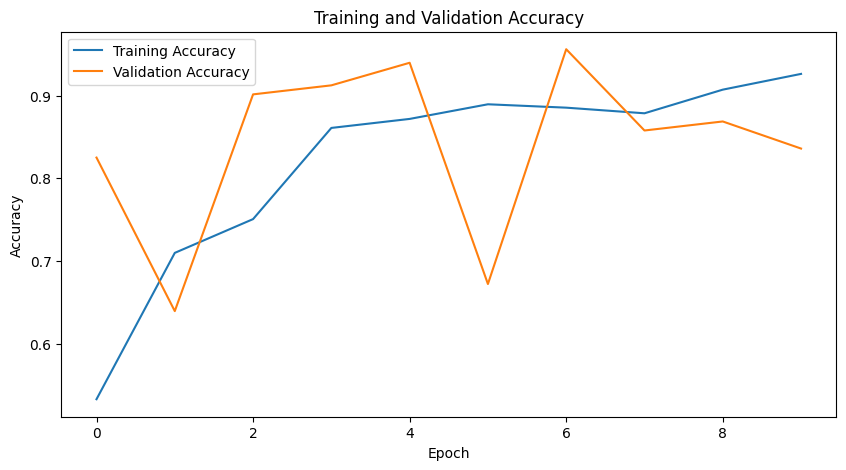

ValueError: Invalid subset name: testing;expected "training" or "validation"

In [32]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Define path to your dataset folder
data_dir = 'data'

# Define hyperparameters
batch_size = 32
epochs = 10
image_size = (224, 224)  # Adjust based on your chosen CNN architecture

# Data preprocessing and augmentation
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data will be used for validation
)

data_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use training subset for training
)

# Print class indices for reference
print("Class Indices:", data_generator.class_indices)

# Visualize a few sample images
sample_images, sample_labels = next(data_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title("Label: " + str(sample_labels[i]))
    plt.axis("off")
plt.show()

validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use validation subset for validation
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    data_generator,
    steps_per_epoch=len(data_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate on testing data
testing_data_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='testing'  # Use testing subset for evaluation
)

test_loss, test_accuracy = model.evaluate(
    testing_data_generator,
    steps=len(testing_data_generator)
)

print("Test Accuracy:", test_accuracy)


In [33]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Define path to your dataset folder
data_dir = 'data'

# Define hyperparameters
batch_size = 32
epochs = 10
image_size = (224, 224) 

In [34]:
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data will be used for validation
)

In [35]:
data_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use training subset for training
)


Found 734 images belonging to 2 classes.


In [36]:
validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use validation subset for validation
)


Found 183 images belonging to 2 classes.


In [37]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(
    data_generator,
    steps_per_epoch=len(data_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
23/23 [==============================] - 98s 4s/step - loss: 1.1106 - accuracy: 0.4986 - val_loss: 0.6329 - val_accuracy: 0.4918
Epoch 2/10
23/23 [==============================] - 100s 4s/step - loss: 0.5979 - accuracy: 0.6717 - val_loss: 0.4144 - val_accuracy: 0.9071
Epoch 3/10
23/23 [==============================] - 99s 4s/step - loss: 0.4895 - accuracy: 0.7752 - val_loss: 0.2447 - val_accuracy: 0.9180
Epoch 4/10
23/23 [==============================] - 99s 4s/step - loss: 0.4011 - accuracy: 0.8038 - val_loss: 0.3162 - val_accuracy: 0.9235
Epoch 5/10
23/23 [==============================] - 99s 4s/step - loss: 0.3217 - accuracy: 0.8583 - val_loss: 0.2098 - val_accuracy: 0.9180
Epoch 6/10
23/23 [==============================] - 99s 4s/step - loss: 0.2402 - accuracy: 0.8951 - val_loss: 0.2199 - val_accuracy: 0.9399
Epoch 7/10
23/23 [==============================] - 101s 4s/step - loss: 0.2606 - accuracy: 0.8978 - val_loss: 0.4384 - val_accuracy: 0.7705
Epoch 8/10
23/23 [

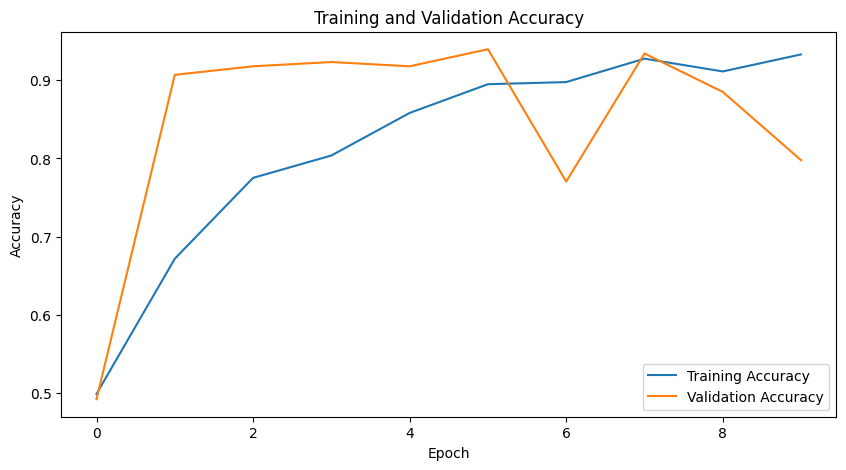

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [41]:
testing_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,  # Do not shuffle testing data
    subset='validation'  # Use validation subset for testing evaluation
)

Found 183 images belonging to 2 classes.


In [42]:
test_loss, test_accuracy = model.evaluate(
    testing_generator,
    steps=len(testing_generator)
)

print("Test Accuracy:", test_accuracy)

6/6 [==============================] - 16s 3s/step - loss: 0.4899 - accuracy: 0.8033
Test Accuracy: 0.8032786846160889


1/1 [==============================] - 0s 27ms/step
The input image is classified as: Good Chili


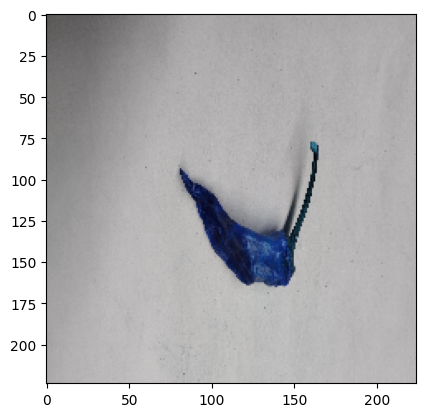

In [56]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model


# Load and preprocess the input image
input_image_path = 'data/BAD/bad_1.jpg'
input_image = cv2.imread(input_image_path)
input_image = cv2.resize(input_image, (224, 224))  # Resize to match model's input size
input_image = input_image / 255.0  # Normalize pixel values
plt.imshow(input_image)
# Perform prediction
prediction = model.predict(np.expand_dims(input_image, 0))

# Interpret prediction result
class_labels = ['Bad Chili', 'Good Chili']
predicted_class_label = class_labels[int(np.round(prediction))]

print(f"The input image is classified as: {predicted_class_label}")
